In [1]:
import pandas as pd
import numpy as np

# import timedelta
from datetime import timedelta

In [2]:
def get_cpi():
    cpi = pd.read_excel('data/CPIAUCSL (1).xls')
    #cpi = pd.read_csv("T5YIE.csv")
    cpi.columns = ["date", 'CPI']
    cpi["date"] = pd.to_datetime(cpi["date"]) - timedelta(days=1)
    return cpi

def get_stocks():
    stocks = pd.read_csv("data/comp_stocks.csv")
    stocks["datadate"] = pd.to_datetime(stocks["datadate"])
    return stocks


def merge_cpi_stock(stocks, cpi):
    merged = pd.merge(stocks, cpi, how="left", left_on="MthCalDt", right_on="date")
    return merged

def bin_inflation_regimes(cpi, labels = ["deflation","low", "mid", "high"], bins = [-10, 0,1,3,20], value = "CPI", col = "Inflation"):
    cpi[col] = pd.cut(cpi[value],bins, labels=labels)
    return cpi


def get_percent_change(cpi):
    cpi["pct_change"] = cpi["CPI"].pct_change()
    return cpi

# get difference in inflation between two months
def get_inflation_diff(cpi):
    cpi["diff"] = cpi["CPI"].diff()
    return cpi

In [374]:
cpi = get_inflation_diff(get_cpi())

In [375]:
stocks = get_stocks()

/var/folders/m6/h9jtrhyn259fytxp6j9xh9v00000gn/T/ipykernel_17871/825584214.py:9: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



In [376]:
stocks.isna().sum()

gvkey             0
iid               0
datadate          0
tic             525
cusip            64
conm              0
dvrate      4790292
cshtrm       842833
prccm        207591
trfm         182853
trt1m        239104
cshoq       6219167
cshom       2939143
exchg          4319
cik         1603867
ggroup      1088733
gind        1088733
gsector     1088733
gsubind     1088733
sic            4424
spcindcd    2663342
spcseccd    2663342
dtype: int64

In [377]:
stocks.shape

(7677804, 22)

In [378]:
# remove stocks with above 500 trt1m
stocks = stocks[stocks["trt1m"] < 500]

# remove stocks with below -100 trt1m
stocks = stocks[stocks["trt1m"] > -100]

In [379]:
stocks.shape

(7415023, 22)

In [380]:
# drop na gics
stocks = stocks.dropna(subset=["ggroup","gind", "gsector", "gsubind"])

In [381]:
# drop missing trt1m
stocks = stocks.dropna(subset=["trt1m"])

In [382]:
stocks.isna().sum()

gvkey             0
iid               0
datadate          0
tic             400
cusip             0
conm              0
dvrate      4360242
cshtrm       607386
prccm         49173
trfm              0
trt1m             0
cshoq       5183981
cshom       2371157
exchg             0
cik          935926
ggroup            0
gind              0
gsector           0
gsubind           0
sic             348
spcindcd    2029763
spcseccd    2029763
dtype: int64

In [383]:
cpi = bin_inflation_regimes(cpi)

In [384]:
cpi

,date,CPI,diff,Inflation
0,1947-12-31,10.24209,NaN,high
1,1948-01-31,9.48196,-0.76013,high
2,1948-02-29,6.81818,-2.66378,high
3,1948-03-31,8.27273,1.45455,high
4,1948-04-30,9.38497,1.11224,high
...,...,...,...,...
895,2022-07-31,8.22736,-0.18582,high
896,2022-08-31,8.21485,-0.01251,high
897,2022-09-30,7.76249,-0.45236,high
898,2022-10-31,7.13535,-0.62714,high


In [385]:
# value counts of gic group
stocks["ggroup"].value_counts()

1510.0    886852
1010.0    532123
4010.0    514775
2010.0    485046
4510.0    398751
4520.0    355368
3520.0    331092
3510.0    323735
2520.0    249671
4020.0    245313
2020.0    239753
2550.0    230002
5510.0    184920
2530.0    184618
3020.0    165073
6010.0    122938
4030.0    119962
2540.0    115395
5010.0    111666
2030.0    110581
5020.0    105713
2510.0     83207
4040.0     80148
4530.0     76240
3030.0     68678
3010.0     62524
Name: ggroup, dtype: int64

In [386]:
stocks["gind"].value_counts()

151040.0    658441
101020.0    443868
401010.0    431499
451030.0    229479
202010.0    198624
             ...  
203030.0     13655
302030.0     10171
203050.0      9974
402040.0      9338
452040.0      4869
Name: gind, Length: 76, dtype: int64

In [387]:
stocks.head()

,gvkey,iid,datadate,tic,cusip,conm,dvrate,cshtrm,prccm,trfm,...,cshom,exchg,cik,ggroup,gind,gsector,gsubind,sic,spcindcd,spcseccd
96,1001,01,1983-10-31,AMFD.,000165100,A & M FOOD SERVICES INC,NaN,370700.0,6.75,1.0,...,NaN,14.0,723576.0,2530.0,253010.0,25.0,25301040.0,5812.0,420.0,978.0
97,1001,01,1983-11-30,AMFD.,000165100,A & M FOOD SERVICES INC,NaN,198000.0,8.00,1.0,...,NaN,14.0,723576.0,2530.0,253010.0,25.0,25301040.0,5812.0,420.0,978.0
98,1001,01,1983-12-31,AMFD.,000165100,A & M FOOD SERVICES INC,NaN,176500.0,7.25,1.0,...,NaN,14.0,723576.0,2530.0,253010.0,25.0,25301040.0,5812.0,420.0,978.0
99,1001,01,1984-01-31,AMFD.,000165100,A & M FOOD SERVICES INC,NaN,160800.0,8.00,1.0,...,NaN,14.0,723576.0,2530.0,253010.0,25.0,25301040.0,5812.0,420.0,978.0
100,1001,01,1984-02-29,AMFD.,000165100,A & M FOOD SERVICES INC,NaN,92400.0,6.50,1.0,...,NaN,14.0,723576.0,2530.0,253010.0,25.0,25301040.0,5812.0,420.0,978.0


In [388]:
merged = pd.merge(stocks, cpi, how="left", left_on="datadate", right_on="date")

In [389]:
# read in gics data
gics = pd.read_csv("data/gics-map-2018.csv")

In [390]:
gics

,SectorId,Sector,IndustryGroupId,IndustryGroup,IndustryId,Industry,SubIndustryId,SubIndustry,SubIndustryDescription
0,10,Energy,1010,Energy,101010,Energy Equipment & Services,10101010,Oil & Gas Drilling,Drilling contractors or owners of drilling rig...
1,10,Energy,1010,Energy,101010,Energy Equipment & Services,10101020,Oil & Gas Equipment & Services,"Manufacturers of equipment, including drilling..."
2,10,Energy,1010,Energy,101020,"Oil, Gas & Consumable Fuels",10102010,Integrated Oil & Gas,Integrated oil companies engaged in the explor...
3,10,Energy,1010,Energy,101020,"Oil, Gas & Consumable Fuels",10102020,Oil & Gas Exploration & Production,Companies engaged in the exploration and produ...
4,10,Energy,1010,Energy,101020,"Oil, Gas & Consumable Fuels",10102030,Oil & Gas Refining & Marketing,Companies engaged in the refining and marketin...
...,...,...,...,...,...,...,...,...,...
153,60,Real Estate,6010,Real Estate,601010,Equity Real Estate Investment Trusts (REITs),60101080,Specialized REITs,Companies or Trusts engaged in the acquisition...
154,60,Real Estate,6010,Real Estate,601020,Real Estate Management & Development,60102010,Diversified Real Estate Activities,Companies engaged in a diverse spectrum of rea...
155,60,Real Estate,6010,Real Estate,601020,Real Estate Management & Development,60102020,Real Estate Operating Companies,Companies engaged in operating real estate pro...
156,60,Real Estate,6010,Real Estate,601020,Real Estate Management & Development,60102030,Real Estate Development,Companies that develop real estate and sell th...


In [391]:
stocks.columns

Index(['gvkey', 'iid', 'datadate', 'tic', 'cusip', 'conm', 'dvrate', 'cshtrm',
       'prccm', 'trfm', 'trt1m', 'cshoq', 'cshom', 'exchg', 'cik', 'ggroup',
       'gind', 'gsector', 'gsubind', 'sic', 'spcindcd', 'spcseccd'],
      dtype='object')

In [392]:
stocks["gsubind"].value_counts()

10102020.0    324638
15104020.0    293403
40101015.0    276887
15104030.0    211287
35201010.0    179022
               ...  
20305020.0      1718
40403040.0      1708
40402035.0       532
40402020.0       307
40402045.0       117
Name: gsubind, Length: 193, dtype: int64

In [393]:
stocks["gsector"].value_counts()

40.0    960198
15.0    886852
25.0    862893
20.0    835380
45.0    830359
35.0    654827
10.0    532123
30.0    296275
50.0    217379
55.0    184920
60.0    122938
Name: gsector, dtype: int64

In [394]:
stocks["gind"].value_counts()

151040.0    658441
101020.0    443868
401010.0    431499
451030.0    229479
202010.0    198624
             ...  
203030.0     13655
302030.0     10171
203050.0      9974
402040.0      9338
452040.0      4869
Name: gind, Length: 76, dtype: int64

In [395]:
stocks["ggroup"].value_counts()

1510.0    886852
1010.0    532123
4010.0    514775
2010.0    485046
4510.0    398751
4520.0    355368
3520.0    331092
3510.0    323735
2520.0    249671
4020.0    245313
2020.0    239753
2550.0    230002
5510.0    184920
2530.0    184618
3020.0    165073
6010.0    122938
4030.0    119962
2540.0    115395
5010.0    111666
2030.0    110581
5020.0    105713
2510.0     83207
4040.0     80148
4530.0     76240
3030.0     68678
3010.0     62524
Name: ggroup, dtype: int64

In [396]:
stocks["ggroup"].value_counts()

1510.0    886852
1010.0    532123
4010.0    514775
2010.0    485046
4510.0    398751
4520.0    355368
3520.0    331092
3510.0    323735
2520.0    249671
4020.0    245313
2020.0    239753
2550.0    230002
5510.0    184920
2530.0    184618
3020.0    165073
6010.0    122938
4030.0    119962
2540.0    115395
5010.0    111666
2030.0    110581
5020.0    105713
2510.0     83207
4040.0     80148
4530.0     76240
3030.0     68678
3010.0     62524
Name: ggroup, dtype: int64

In [397]:
# get all columns that begin with g
gics_cols = [col for col in stocks.columns if col.startswith("g")]

stocks[gics_cols[1:]]

,ggroup,gind,gsector,gsubind
96,2530.0,253010.0,25.0,25301040.0
97,2530.0,253010.0,25.0,25301040.0
98,2530.0,253010.0,25.0,25301040.0
99,2530.0,253010.0,25.0,25301040.0
100,2530.0,253010.0,25.0,25301040.0
...,...,...,...,...
7677798,3030.0,303020.0,30.0,30302010.0
7677799,3030.0,303020.0,30.0,30302010.0
7677801,2010.0,201040.0,20.0,20104020.0
7677802,2010.0,201040.0,20.0,20104020.0


In [398]:
stocks["trt1m"].describe()

count    6.384144e+06
mean     1.683511e+00
std      3.064429e+01
min     -9.999990e+01
25%     -8.000000e+00
50%      0.000000e+00
75%      6.849300e+00
max      4.999999e+02
Name: trt1m, dtype: float64

<AxesSubplot:>

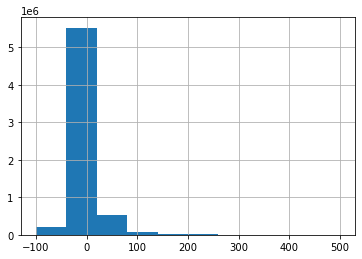

In [399]:
stocks["trt1m"].hist()

In [400]:
merged["trt1m"].median()

0.0

In [401]:
merged["trt1m"]

0          10.2041
1          18.5185
2          -9.3750
3          10.3448
4         -18.7500
            ...   
6384139    16.1103
6384140     1.2500
6384141    26.9057
6384142     2.5523
6384143    13.4587
Name: trt1m, Length: 6384144, dtype: float64

In [402]:
sector = merged.groupby(["gsector","Inflation"]).mean()["trt1m"]

/var/folders/m6/h9jtrhyn259fytxp6j9xh9v00000gn/T/ipykernel_17871/2554018360.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [403]:
group = merged.groupby(["ggroup","Inflation"]).mean()["trt1m"]

/var/folders/m6/h9jtrhyn259fytxp6j9xh9v00000gn/T/ipykernel_17871/260058708.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [404]:
ind = merged.groupby(["gind","Inflation"]).mean()["trt1m"]

/var/folders/m6/h9jtrhyn259fytxp6j9xh9v00000gn/T/ipykernel_17871/3808833815.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [405]:
sub_ind = merged.groupby(["gsubind","Inflation"]).mean()["trt1m"]

/var/folders/m6/h9jtrhyn259fytxp6j9xh9v00000gn/T/ipykernel_17871/2469726151.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [406]:
gics

,SectorId,Sector,IndustryGroupId,IndustryGroup,IndustryId,Industry,SubIndustryId,SubIndustry,SubIndustryDescription
0,10,Energy,1010,Energy,101010,Energy Equipment & Services,10101010,Oil & Gas Drilling,Drilling contractors or owners of drilling rig...
1,10,Energy,1010,Energy,101010,Energy Equipment & Services,10101020,Oil & Gas Equipment & Services,"Manufacturers of equipment, including drilling..."
2,10,Energy,1010,Energy,101020,"Oil, Gas & Consumable Fuels",10102010,Integrated Oil & Gas,Integrated oil companies engaged in the explor...
3,10,Energy,1010,Energy,101020,"Oil, Gas & Consumable Fuels",10102020,Oil & Gas Exploration & Production,Companies engaged in the exploration and produ...
4,10,Energy,1010,Energy,101020,"Oil, Gas & Consumable Fuels",10102030,Oil & Gas Refining & Marketing,Companies engaged in the refining and marketin...
...,...,...,...,...,...,...,...,...,...
153,60,Real Estate,6010,Real Estate,601010,Equity Real Estate Investment Trusts (REITs),60101080,Specialized REITs,Companies or Trusts engaged in the acquisition...
154,60,Real Estate,6010,Real Estate,601020,Real Estate Management & Development,60102010,Diversified Real Estate Activities,Companies engaged in a diverse spectrum of rea...
155,60,Real Estate,6010,Real Estate,601020,Real Estate Management & Development,60102020,Real Estate Operating Companies,Companies engaged in operating real estate pro...
156,60,Real Estate,6010,Real Estate,601020,Real Estate Management & Development,60102030,Real Estate Development,Companies that develop real estate and sell th...


In [407]:
sector_df = sector.to_frame().reset_index().rename({"level_0": "regime", "level_1": "industry"}, axis=1).merge(gics[["Sector", "SectorId"]], how="left", left_on="gsector", right_on="SectorId")

In [408]:
sector_df.drop_duplicates(inplace=True)

In [409]:
import plotly.express as px

fig = px.bar(sector_df, x="Sector", y="trt1m", color="Inflation", barmode="group")
fig.show()

In [410]:
sector_counts = merged.groupby(["gsector","Inflation"]).count()["trt1m"]
sector_df_counts = sector_counts.to_frame().reset_index().rename({"level_0": "regime", "level_1": "factor"}, axis=1).merge(gics[["Sector", "SectorId"]], how="left", left_on="gsector", right_on="SectorId")

In [411]:
sector_df_counts.drop_duplicates(inplace=True)

In [412]:
fig = px.bar(sector_df_counts, x="Sector", y="trt1m", color="Inflation", barmode="group")
fig.show()

In [413]:
group_df = group.to_frame().reset_index().rename({"level_0": "regime", "level_1": "industry"}, axis=1).merge(gics[["IndustryGroup", "IndustryGroupId"]], how="left", left_on="ggroup", right_on="IndustryGroupId")
group_df.drop_duplicates(inplace=True)

fig = px.bar(group_df, x="IndustryGroup", y="trt1m", color="Inflation", barmode="group")
fig.show()

In [414]:
ind_df = ind.to_frame().reset_index().rename({"level_0": "regime", "level_1": "industry"}, axis=1).merge(gics[["Industry", "IndustryId"]], how="left", left_on="gind", right_on="IndustryId")
ind_df.drop_duplicates(inplace=True)

fig = px.bar(ind_df, x="Industry", y="trt1m", color="Inflation", barmode="group")
fig.show()

In [415]:
gics

,SectorId,Sector,IndustryGroupId,IndustryGroup,IndustryId,Industry,SubIndustryId,SubIndustry,SubIndustryDescription
0,10,Energy,1010,Energy,101010,Energy Equipment & Services,10101010,Oil & Gas Drilling,Drilling contractors or owners of drilling rig...
1,10,Energy,1010,Energy,101010,Energy Equipment & Services,10101020,Oil & Gas Equipment & Services,"Manufacturers of equipment, including drilling..."
2,10,Energy,1010,Energy,101020,"Oil, Gas & Consumable Fuels",10102010,Integrated Oil & Gas,Integrated oil companies engaged in the explor...
3,10,Energy,1010,Energy,101020,"Oil, Gas & Consumable Fuels",10102020,Oil & Gas Exploration & Production,Companies engaged in the exploration and produ...
4,10,Energy,1010,Energy,101020,"Oil, Gas & Consumable Fuels",10102030,Oil & Gas Refining & Marketing,Companies engaged in the refining and marketin...
...,...,...,...,...,...,...,...,...,...
153,60,Real Estate,6010,Real Estate,601010,Equity Real Estate Investment Trusts (REITs),60101080,Specialized REITs,Companies or Trusts engaged in the acquisition...
154,60,Real Estate,6010,Real Estate,601020,Real Estate Management & Development,60102010,Diversified Real Estate Activities,Companies engaged in a diverse spectrum of rea...
155,60,Real Estate,6010,Real Estate,601020,Real Estate Management & Development,60102020,Real Estate Operating Companies,Companies engaged in operating real estate pro...
156,60,Real Estate,6010,Real Estate,601020,Real Estate Management & Development,60102030,Real Estate Development,Companies that develop real estate and sell th...


In [416]:
gics_cols

['gvkey', 'ggroup', 'gind', 'gsector', 'gsubind']

In [417]:
sub_ind_df = sub_ind.to_frame().reset_index().rename({"level_0": "regime", "level_1": "industry"}, axis=1).merge(gics[["SubIndustry", "SubIndustryId"]], how="left", left_on="gsubind", right_on="SubIndustryId")
sub_ind_df.drop_duplicates(inplace=True)

fig = px.bar(sub_ind_df, x="SubIndustry", y="trt1m", color="Inflation", barmode="group")
fig.show()

In [527]:
#plot cpi against forecast value
fig = px.line(forecast, x="date", y="Value", title='CPI Forecast')
# plot cpi on same graph
fig.add_scatter(x=cpi["date"], y=cpi["CPI"], name="CPI")

bins = [-10, 0, 1 ,3,20]
colors = ["pink", "yellow", "green", "red"]
# add shades of color for inflation regimes
for bins_i in range(len(bins)-1):
    col = colors[bins_i]
    l_bin = bins[bins_i]
    u_bin = bins[bins_i+1]

    fig.add_hrect(y0 = l_bin, y1=u_bin, fillcolor=col, opacity=0.25, line_width=0)

fig.show()

# Port Cons

In [3]:
'''
merge forecast and CPI and stocks
move CPI and forecast back
forward feed forecast quarterly to monthly

ID times switchs in inflation regime given forecast
'''



'\nmerge forecast and CPI and stocks\nmove CPI and forecast back\nforward feed forecast quarterly to monthly\n\nID times switchs in inflation regime given forecast\n'

In [3]:
cpi = get_inflation_diff(get_cpi())
cpi = bin_inflation_regimes(cpi)

In [4]:
forecast = pd.read_csv("DP_LIVE_15022023004115418.csv")
forecast["date"] = pd.to_datetime(forecast["TIME"])
forecast = forecast.sort_values(by="date")
forecast[forecast.duplicated(subset=["date"], keep=False)]
forecast = forecast[forecast["LOCATION"] == "USA"]

forecast["date"] = forecast["date"]-timedelta(days=1)

In [5]:
forecast = forecast[["date", "Value"]]

In [6]:
cpi = cpi.merge(forecast,on="date", how="left")

In [7]:
cpi["Forecast"] = cpi["Value"].fillna(method="ffill")

In [8]:
cpi["cpi_next_month"] = cpi["CPI"].shift(-1)

In [9]:
cpi["change_in_CPI"] = cpi["cpi_next_month"] - cpi["CPI"]

In [10]:
cpi

,date,CPI,diff,Inflation,Value,Forecast,cpi_next_month,change_in_CPI
0,1947-12-31,10.24209,NaN,high,NaN,NaN,9.48196,-0.76013
1,1948-01-31,9.48196,-0.76013,high,NaN,NaN,6.81818,-2.66378
2,1948-02-29,6.81818,-2.66378,high,NaN,NaN,8.27273,1.45455
3,1948-03-31,8.27273,1.45455,high,NaN,NaN,9.38497,1.11224
4,1948-04-30,9.38497,1.11224,high,NaN,NaN,9.37500,-0.00997
...,...,...,...,...,...,...,...,...
895,2022-07-31,8.22736,-0.18582,high,NaN,8.317612,8.21485,-0.01251
896,2022-08-31,8.21485,-0.01251,high,NaN,8.317612,7.76249,-0.45236
897,2022-09-30,7.76249,-0.45236,high,7.054659,7.054659,7.13535,-0.62714
898,2022-10-31,7.13535,-0.62714,high,NaN,7.054659,6.44494,-0.69041


In [11]:
# if next month inflation regime is above 3 then it is high, between 1 and 3 it is mid, between 0 and 1 it is low, below 0 it is deflation
cpi["next_month_inflation_regime"] = pd.cut(cpi["cpi_next_month"], bins=[-10,0, 1,3,20], labels=["deflation", "low", "mid", "high"])

In [12]:
# find differences between current and next month inflation regime
cpi["flag"] = cpi["next_month_inflation_regime"] != cpi["Inflation"]

In [13]:
change_in_regime = cpi[cpi["flag"] == True][["date", "CPI", "Inflation", "cpi_next_month", "next_month_inflation_regime"]]
# get changes in inflation regime dates past 1980
reconst_dates = change_in_regime.dropna()["date"]

In [14]:
reconst_dates

10    1948-10-31
14    1949-02-28
15    1949-03-31
29    1950-05-31
32    1950-08-31
         ...    
821   2016-05-31
822   2016-06-30
866   2020-02-29
869   2020-05-31
878   2021-02-28
Name: date, Length: 87, dtype: datetime64[ns]

In [15]:
stocks = get_stocks()
# remove stocks with above 500 trt1m
stocks = stocks[stocks["trt1m"] < 500]

# remove stocks with below -100 trt1m
stocks = stocks[stocks["trt1m"] > -100]
# drop na gics
stocks = stocks.dropna(subset=["ggroup","gind", "gsector", "gsubind"])
# drop missing trt1m
stocks = stocks.dropna(subset=["trt1m"])


# 


/var/folders/m6/h9jtrhyn259fytxp6j9xh9v00000gn/T/ipykernel_23495/825584214.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  stocks = pd.read_csv("data/comp_stocks.csv")


In [16]:
# drop stocks that have negative price
stocks = stocks[stocks["prccm"] > 0]
print(stocks.shape)


(6322687, 22)


In [17]:
stocks["cshoq"] = stocks.groupby("gvkey")["cshoq"].ffill()
print(stocks.shape)

(6322687, 22)


In [18]:
# drop stocks that have negative shares
stocks = stocks[stocks["cshoq"] > 0]
print(stocks.shape)


(4792686, 22)


In [19]:

# for each stock forward fill missing cshoq


# calculate market cap
stocks["market_cap"] = stocks["prccm"] * stocks["cshoq"]
print(stocks.shape)

(4792686, 23)


In [20]:
stocks["market_cap_shifted"] = stocks.groupby("gvkey")["market_cap"].shift(1) 

In [21]:
# import ployly
import plotly.express as px


In [22]:
# import monthend
from pandas.tseries.offsets import MonthEnd

In [23]:
change_dates = cpi[cpi["flag"] == True][["date", "CPI", "Inflation", "cpi_next_month", "next_month_inflation_regime"]].dropna()

In [24]:
dates_list = []

# for each row using index
for i in range(len(change_dates)):
    date = []
    if i == 0:
        start_date = cpi.iloc[0]["date"]
        date.append(start_date)
        
        inflation_regime = cpi.iloc[0]["Inflation"]
        date.append(inflation_regime)
    else:
        # add one month

        start_date = change_dates.iloc[i-1]["date"] + timedelta(days=1) + MonthEnd(0)
        date.append(start_date)
        
        inflation_regime = change_dates.iloc[i]["Inflation"]
        date.append(inflation_regime)
    
    end_date = change_dates.iloc[i]["date"]
    date.append(end_date)

    dates_list.append(date)



In [25]:
# list of lists to dataframe
dates = pd.DataFrame(dates_list, columns=["start_date", "inflation_regime", "end_date"])

In [26]:
regime_names = ["deflation", "low", "mid", "high"]

In [27]:
# get stocks date min
cpi = cpi[cpi["date"] >= stocks["datadate"].min()]

In [28]:
change_in_regime = cpi[cpi["flag"] == True][["date", "CPI", "Inflation", "cpi_next_month", "next_month_inflation_regime"]]
# get changes in inflation regime dates past 1980
reconst_dates = change_in_regime.dropna()["date"]
# get beginning of month and year for reconst_dates
reconst_dates = reconst_dates.apply(lambda x: x.replace(day=1))

In [29]:
change_in_regime

,date,CPI,Inflation,cpi_next_month,next_month_inflation_regime
182,1963-02-28,1.12695,mid,0.89374,low
184,1963-04-30,0.89286,low,1.32406,mid
187,1963-07-31,1.55218,mid,0.98619,low
188,1963-08-31,0.98619,low,1.21791,mid
198,1964-06-30,1.07527,mid,0.97561,low
...,...,...,...,...,...
822,2016-06-30,0.86836,low,1.05532,mid
866,2020-02-29,1.54287,mid,0.34520,low
869,2020-05-31,0.71602,low,1.01414,mid
878,2021-02-28,2.63052,mid,4.13055,high


In [30]:
dates

,start_date,inflation_regime,end_date
0,1947-12-31,high,1948-10-31
1,1948-11-30,mid,1949-02-28
2,1949-03-31,low,1949-03-31
3,1949-04-30,deflation,1950-05-31
4,1950-06-30,mid,1950-08-31
...,...,...,...
82,2016-03-31,mid,2016-05-31
83,2016-06-30,low,2016-06-30
84,2016-07-31,mid,2020-02-29
85,2020-03-31,low,2020-05-31


In [31]:
change_in_regime

,date,CPI,Inflation,cpi_next_month,next_month_inflation_regime
182,1963-02-28,1.12695,mid,0.89374,low
184,1963-04-30,0.89286,low,1.32406,mid
187,1963-07-31,1.55218,mid,0.98619,low
188,1963-08-31,0.98619,low,1.21791,mid
198,1964-06-30,1.07527,mid,0.97561,low
...,...,...,...,...,...
822,2016-06-30,0.86836,low,1.05532,mid
866,2020-02-29,1.54287,mid,0.34520,low
869,2020-05-31,0.71602,low,1.01414,mid
878,2021-02-28,2.63052,mid,4.13055,high


In [32]:
# get dates that are greater than stocks date min
dates = dates[dates["start_date"] >= stocks["datadate"].min()]


In [33]:
dates

,start_date,inflation_regime,end_date
24,1962-02-28,mid,1963-02-28
25,1963-03-31,low,1963-04-30
26,1963-05-31,mid,1963-07-31
27,1963-08-31,low,1963-08-31
28,1963-09-30,mid,1964-06-30
...,...,...,...
82,2016-03-31,mid,2016-05-31
83,2016-06-30,low,2016-06-30
84,2016-07-31,mid,2020-02-29
85,2020-03-31,low,2020-05-31


In [34]:
try:
    # get dates that are more than max but less than first row start date of dates 
    get_existing_inflation_regime = change_in_regime[(change_in_regime['date'] >= stocks["datadate"].min()) & (change_in_regime["date"] < dates.iloc[0]["start_date"])]["Inflation"].values[0]


    # append to beginning of dates
    dates = pd.concat([pd.DataFrame([[stocks["datadate"].min(), get_existing_inflation_regime, dates.iloc[0]["start_date"]-MonthEnd(1)]], columns=["start_date", "inflation_regime", "end_date"]), dates])

except IndexError:
    pass

In [35]:
dates

,start_date,inflation_regime,end_date
24,1962-02-28,mid,1963-02-28
25,1963-03-31,low,1963-04-30
26,1963-05-31,mid,1963-07-31
27,1963-08-31,low,1963-08-31
28,1963-09-30,mid,1964-06-30
...,...,...,...
82,2016-03-31,mid,2016-05-31
83,2016-06-30,low,2016-06-30
84,2016-07-31,mid,2020-02-29
85,2020-03-31,low,2020-05-31


In [36]:
stocks["datadate"].min()

Timestamp('1962-02-28 00:00:00')

In [37]:
dates

,start_date,inflation_regime,end_date
24,1962-02-28,mid,1963-02-28
25,1963-03-31,low,1963-04-30
26,1963-05-31,mid,1963-07-31
27,1963-08-31,low,1963-08-31
28,1963-09-30,mid,1964-06-30
...,...,...,...
82,2016-03-31,mid,2016-05-31
83,2016-06-30,low,2016-06-30
84,2016-07-31,mid,2020-02-29
85,2020-03-31,low,2020-05-31


In [38]:
stocks["datadate"].min()

Timestamp('1962-02-28 00:00:00')

In [39]:
reconst_dates

182   1963-02-01
184   1963-04-01
187   1963-07-01
188   1963-08-01
198   1964-06-01
         ...    
821   2016-05-01
822   2016-06-01
866   2020-02-01
869   2020-05-01
878   2021-02-01
Name: date, Length: 63, dtype: datetime64[ns]

In [40]:
change_in_regime

,date,CPI,Inflation,cpi_next_month,next_month_inflation_regime
182,1963-02-28,1.12695,mid,0.89374,low
184,1963-04-30,0.89286,low,1.32406,mid
187,1963-07-31,1.55218,mid,0.98619,low
188,1963-08-31,0.98619,low,1.21791,mid
198,1964-06-30,1.07527,mid,0.97561,low
...,...,...,...,...,...
822,2016-06-30,0.86836,low,1.05532,mid
866,2020-02-29,1.54287,mid,0.34520,low
869,2020-05-31,0.71602,low,1.01414,mid
878,2021-02-28,2.63052,mid,4.13055,high


In [41]:
dates

,start_date,inflation_regime,end_date
24,1962-02-28,mid,1963-02-28
25,1963-03-31,low,1963-04-30
26,1963-05-31,mid,1963-07-31
27,1963-08-31,low,1963-08-31
28,1963-09-30,mid,1964-06-30
...,...,...,...
82,2016-03-31,mid,2016-05-31
83,2016-06-30,low,2016-06-30
84,2016-07-31,mid,2020-02-29
85,2020-03-31,low,2020-05-31


In [42]:
change_in_regime

,date,CPI,Inflation,cpi_next_month,next_month_inflation_regime
182,1963-02-28,1.12695,mid,0.89374,low
184,1963-04-30,0.89286,low,1.32406,mid
187,1963-07-31,1.55218,mid,0.98619,low
188,1963-08-31,0.98619,low,1.21791,mid
198,1964-06-30,1.07527,mid,0.97561,low
...,...,...,...,...,...
822,2016-06-30,0.86836,low,1.05532,mid
866,2020-02-29,1.54287,mid,0.34520,low
869,2020-05-31,0.71602,low,1.01414,mid
878,2021-02-28,2.63052,mid,4.13055,high


In [43]:
'''
create portfolio for each regime (Dataframe....date with list of stocks in portfolio)

for each reconst date
        switch portfolio using dictionary if available
            if available
                get current stocks that are in same group as dictionary group list
            if not available
                do nothing

        Add new best/worst data into dictionary of previous inflation period

    save portfolio df...current date and list of stocks picked
'''

'\ncreate portfolio for each regime (Dataframe....date with list of stocks in portfolio)\n\nfor each reconst date\n        switch portfolio using dictionary if available\n            if available\n                get current stocks that are in same group as dictionary group list\n            if not available\n                do nothing\n\n        Add new best/worst data into dictionary of previous inflation period\n\n    save portfolio df...current date and list of stocks picked\n'

In [44]:
# get number of unique ggroups
len(stocks["ggroup"].unique())

26

In [45]:
from tqdm import tqdm

In [46]:
dates

,start_date,inflation_regime,end_date
24,1962-02-28,mid,1963-02-28
25,1963-03-31,low,1963-04-30
26,1963-05-31,mid,1963-07-31
27,1963-08-31,low,1963-08-31
28,1963-09-30,mid,1964-06-30
...,...,...,...
82,2016-03-31,mid,2016-05-31
83,2016-06-30,low,2016-06-30
84,2016-07-31,mid,2020-02-29
85,2020-03-31,low,2020-05-31


In [47]:
cpi

,date,CPI,diff,Inflation,Value,Forecast,cpi_next_month,change_in_CPI,next_month_inflation_regime,flag
170,1962-02-28,1.10590,0.20107,mid,NaN,0.893655,1.34183,0.23593,mid,False
171,1962-03-31,1.34183,0.23593,mid,1.307409,1.307409,1.34048,-0.00135,mid,False
172,1962-04-30,1.34048,-0.00135,mid,NaN,1.307409,1.23995,-0.10053,mid,False
173,1962-05-31,1.23995,-0.10053,mid,NaN,1.307409,1.00267,-0.23728,mid,False
174,1962-06-30,1.00267,-0.23728,mid,1.202137,1.202137,1.13560,0.13293,mid,False
...,...,...,...,...,...,...,...,...,...,...
895,2022-07-31,8.22736,-0.18582,high,NaN,8.317612,8.21485,-0.01251,high,False
896,2022-08-31,8.21485,-0.01251,high,NaN,8.317612,7.76249,-0.45236,high,False
897,2022-09-30,7.76249,-0.45236,high,7.054659,7.054659,7.13535,-0.62714,high,False
898,2022-10-31,7.13535,-0.62714,high,NaN,7.054659,6.44494,-0.69041,high,False


In [48]:
cpi[cpi['date'].isin(reconst_dates + MonthEnd(0))]

,date,CPI,diff,Inflation,Value,Forecast,cpi_next_month,change_in_CPI,next_month_inflation_regime,flag
182,1963-02-28,1.12695,-0.10188,mid,NaN,1.228964,0.89374,-0.23321,low,True
184,1963-04-30,0.89286,-0.00088,low,NaN,1.036841,1.32406,0.43120,mid,True
187,1963-07-31,1.55218,-0.00308,mid,NaN,1.363836,0.98619,-0.56599,low,True
188,1963-08-31,0.98619,-0.56599,low,NaN,1.363836,1.21791,0.23172,mid,True
198,1964-06-30,1.07527,-0.23149,mid,1.074219,1.074219,0.97561,-0.09966,low,True
...,...,...,...,...,...,...,...,...,...,...
821,2016-05-31,1.07929,0.00081,mid,NaN,1.110033,0.86836,-0.21093,low,True
822,2016-06-30,0.86836,-0.21093,low,1.157148,1.157148,1.05532,0.18696,mid,True
866,2020-02-29,1.54287,-0.79645,mid,NaN,2.102443,0.34520,-1.19767,low,True
869,2020-05-31,0.71602,0.48961,low,NaN,0.444735,1.01414,0.29812,mid,True


In [49]:
reconst_dates

182   1963-02-01
184   1963-04-01
187   1963-07-01
188   1963-08-01
198   1964-06-01
         ...    
821   2016-05-01
822   2016-06-01
866   2020-02-01
869   2020-05-01
878   2021-02-01
Name: date, Length: 63, dtype: datetime64[ns]

In [190]:
grouping = "gsubind"
get_top = .1

groups = {i: {"best": None, "worst": None} for i in regime_names}

portfolio = pd.DataFrame(columns=["date", "long", "short", "current_inflation_regime", "next_inflation_regime", "best_groups", "worst_groups"])

for reconst_date in tqdm(reconst_dates):
    #print(reconst_date)
    # substract a day from reconst date
    stock_date = reconst_date - timedelta(days=1)
    #print(stock_date)
    # get stocks on that date
    stocks_on_date = stocks[stocks["datadate"] == stock_date]
    # get inflation regime on that date
    current_inflation_regime = cpi[cpi["date"] == reconst_date+ MonthEnd(0)]["Inflation"].values[0]
    next_inflation_regime = cpi[cpi["date"] == reconst_date+ MonthEnd(0)]["next_month_inflation_regime"].values[0]

    assert current_inflation_regime != next_inflation_regime

    new_row_portfolio = {"date": reconst_date, "long": [], "short": [], "current_inflation_regime": current_inflation_regime, "next_inflation_regime": next_inflation_regime, "best_groups": [], "worst_groups": []}

    # if regime is in dictionary
    if (groups[next_inflation_regime]["best"] != None) & (groups[next_inflation_regime]["worst"] != None):
        best_groups = groups[next_inflation_regime]["best"]
        worst_groups = groups[next_inflation_regime]["worst"]
        # get stocks in best groups
        best_stocks = stocks_on_date[stocks_on_date[grouping].isin(best_groups)]["gvkey"].values
        # get stocks in worst groups
        worst_stocks = stocks_on_date[stocks_on_date[grouping].isin(worst_groups)]["gvkey"].values

        # add to portfolio
        new_row_portfolio["long"] = best_stocks
        new_row_portfolio["short"] = worst_stocks

        # add best and worst groups to portfolio
        new_row_portfolio["best_groups"] = best_groups
        new_row_portfolio["worst_groups"] = worst_groups

    
    # get all stocks in that regime
    last_current_inflation_date = reconst_date + MonthEnd(0)
    #print(next_inflation_date)

    # print(reconst_dates)
    # print(reconst_date)

    # print(next_inflation_date)
    # display(dates)
    start_inflation_date = dates[dates["end_date"] == last_current_inflation_date]["start_date"].values[0]

    # get stocks in that regime
    stocks_in_regime = stocks[(stocks["datadate"] >= start_inflation_date) & (stocks["datadate"] <= last_current_inflation_date)]

    #display(stocks_in_regime)
    # find best groups and worst groups
    temp_groups = stocks_in_regime.groupby(grouping)["trt1m"].mean().sort_values(ascending=False).index
    best_groups = temp_groups[:int(len(temp_groups)*get_top)]
    worst_groups = temp_groups[int(len(temp_groups)*(1-get_top)):]

    # add best and worst groups to dictionary
    groups[current_inflation_regime]["best"] = list(best_groups)
    groups[current_inflation_regime]["worst"] = list(worst_groups)


    # add row to df portfolio using concat
    portfolio = pd.concat([portfolio, pd.DataFrame([new_row_portfolio])], ignore_index=True)


    


100%|██████████| 63/63 [00:02<00:00, 21.76it/s]


In [168]:
gics = pd.read_csv("data/gics-map-2018.csv")

In [194]:
gics.columns

Index(['SectorId', 'Sector', 'IndustryGroupId', 'IndustryGroup', 'IndustryId',
       'Industry', 'SubIndustryId', 'SubIndustry', 'SubIndustryDescription'],
      dtype='object')

In [195]:
gics_name = "SubIndustry"

best_groups_readables = []

for best_groups_i in portfolio["best_groups"]:
    best_group_readable = []

    if best_groups_i == []:
        best_group_readable.append("None")
    else:
        for best_group in best_groups_i:
            temp = gics[gics[gics_name + "Id"] == best_group][gics_name]
            if temp.shape[0] > 0:
                best_group_readable.append(temp.values[0])
            else:
                best_group_readable.append("Unknown")

    best_groups_readables.append(best_group_readable)

worst_groups_readables = []


for worst_groups_i in portfolio["worst_groups"]:
    worst_group_readable = []

    if worst_groups_i == []:
        worst_group_readable.append("None")
    else:
        for worst_group in worst_groups_i:
            temp = gics[gics[gics_name + "Id"] == worst_group][gics_name]
            if temp.shape[0] > 0:
                worst_group_readable.append(temp.values[0])
            else:
                worst_group_readable.append("Unknown")

    worst_groups_readables.append(worst_group_readable)


In [196]:
portfolio["best_groups_readable"] = best_groups_readables
portfolio["worst_groups_readable"] = worst_groups_readables

In [197]:
portfolio

,date,long,short,current_inflation_regime,next_inflation_regime,best_groups,worst_groups,best_groups_readable,worst_groups_readable
0,1963-02-01,[],[],mid,low,[],[],[None],[None]
1,1963-04-01,[],"[1595, 2014, 2024, 2029, 2943, 2968, 3066, 346...",low,mid,[],[40101010.0],[None],[Diversified Banks]
2,1963-07-01,[],"[7562, 10978]",mid,low,[],[40201020.0],[None],[Other Diversified Financial Services]
3,1963-08-01,[],"[7562, 10978]",low,mid,[],[40201020.0],[None],[Other Diversified Financial Services]
4,1964-06-01,[],"[1595, 2014, 2024, 2029, 2943, 2968, 3066, 346...",mid,low,[],[40101010.0],[None],[Diversified Banks]
...,...,...,...,...,...,...,...,...,...
58,2016-05-01,"[1186, 1186, 1585, 1659, 1681, 1783, 1790, 192...","[1121, 1234, 1254, 1262, 1262, 1487, 1526, 160...",mid,low,"[45205020.0, 40403020.0, 15104045.0, 15104030....","[35203010.0, 60102040.0, 40301030.0, 20201070....","[Unknown, Unknown, Silver, Gold, Agricultural ...","[Life Sciences Tools & Services, Real Estate S..."
59,2016-06-01,"[1186, 1186, 1613, 1661, 1681, 1790, 1860, 196...","[1126, 1266, 1722, 1814, 1895, 1932, 2080, 217...",low,mid,"[40401010.0, 15104045.0, 15104020.0, 15104040....","[25201020.0, 25201010.0, 25201040.0, 25301040....","[Unknown, Silver, Diversified Metals & Mining,...","[Home Furnishings, Consumer Electronics, House..."
60,2020-02-01,"[1075, 1121, 1186, 1186, 1228, 1440, 1661, 179...","[1209, 1254, 1262, 1262, 1393, 1602, 1662, 174...",mid,low,"[25401010.0, 40403040.0, 15104040.0, 15104045....","[35201010.0, 50101010.0, 20304020.0, 25203030....","[Unknown, Unknown, Precious Metals & Minerals,...","[Biotechnology, Alternative Carriers, Trucking..."
61,2020-05-01,"[1272, 1662, 1874, 2586, 2644, 2751, 2890, 524...","[1209, 1254, 1257, 1262, 1262, 1274, 1661, 241...",low,mid,"[40403040.0, 25502010.0, 45205020.0, 40403020....","[20305030.0, 10102040.0, 25504010.0, 40401010....","[Unknown, Unknown, Unknown, Unknown, Unknown, ...","[Marine Ports & Services, Oil & Gas Storage & ..."


In [203]:
skip_first = 0
value_weighted = False
# create empty series for long_short returns that can be appended to
port_returns = pd.Series(dtype="float64")

for i in range(skip_first,len(portfolio["date"])-1):

    current_date = portfolio["date"].values[i]
    next_date = portfolio["date"].values[i+1]

    # get the stocks during that dates
    stocks_current_date = stocks[(stocks["datadate"] >= current_date) & (stocks["datadate"] < next_date)]

    # get long stocks from current date
    long_stocks = portfolio["long"].values[i]
    # get short stocks from current date
    short_stocks = portfolio["short"].values[i]

    stocks_long = stocks_current_date[stocks_current_date["gvkey"].isin(long_stocks)].copy()
    stocks_short = stocks_current_date[stocks_current_date["gvkey"].isin(short_stocks)].copy()

    stocks_long["bins"] = "long"
    stocks_short["bins"] = "short"

    # concat long and short stocks
    stocks_long_short = pd.concat([stocks_long, stocks_short], ignore_index=True)

    
    if value_weighted:
        stocks_long_short = pd.merge(stocks_long_short, stocks_long_short.groupby(["datadate", "bins"])["market_cap_shifted"].sum().reset_index(), on=["datadate", "bins"], how="inner").rename({"market_cap_shifted_y": "Sum Market Cap Shifted", "market_cap_shifted_x": "market_cap_shifted"}, axis=1)
        stocks_long_short["weight"] = stocks_long_short["market_cap_shifted"] / stocks_long_short["Sum Market Cap Shifted"]
    else:
        stocks_long_short = pd.merge(stocks_long_short, stocks_long_short.groupby(["datadate", "bins"])["trt1m"].count().reset_index().rename({"trt1m":"Count in Bin for Month"}, axis=1))
        stocks_long_short["weight"] = 1 /stocks_long_short["Count in Bin for Month"] 
    
    stocks_long_short["stock return"] = stocks_long_short["trt1m"] * stocks_long_short["weight"]
    

    # sum all long returns group by month
    sum_returns = stocks_long_short.groupby(["datadate", "bins"])["stock return"].sum().reset_index()

    # negatate returns for short
    sum_returns.loc[sum_returns["bins"] == "short", "stock return"] = -sum_returns.loc[sum_returns["bins"] == "short", "stock return"]

    long_short_returns = sum_returns.groupby("datadate")["stock return"].sum()

    # add long_short_returns to series
    port_returns = pd.concat([port_returns, long_short_returns])
    


In [204]:
port_returns

1963-04-30    -4.151219
1963-05-31     0.069333
1963-06-30    -0.352293
1963-07-31     0.865900
1963-08-31    -4.130750
                ...    
2020-09-30     5.303406
2020-10-31     7.334217
2020-11-30   -10.754351
2020-12-31    13.933499
2021-01-31    16.497756
Length: 686, dtype: float64

In [205]:
# plot returns over time using plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=port_returns.index, y=port_returns.values, mode="lines", name="Portfolio Returns"))

fig.update_layout(title="Portfolio Returns Over Time", xaxis_title="Date", yaxis_title="Returns")

fig.show()


In [206]:
# create hist of returns using plotly
fig = px.histogram(port_returns, x=port_returns.values, nbins=100, title="Portfolio Returns")
fig.show()

In [207]:
# mean of returns
port_returns.mean()

0.519551751696955

In [208]:
# get size of long from each row
long_size = []
short_size = []
for i in range(len(portfolio)): 
    long_size.append(len(portfolio["long"][i]))
    short_size.append(len(portfolio["short"][i]))

In [209]:
#import go
import plotly.graph_objects as go

In [210]:
# plot size of long and short using plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=portfolio["date"], y=long_size, name="long"))
fig.add_trace(go.Scatter(x=portfolio["date"], y=short_size, name="short"))
fig.update_layout(title="Size of Long and Short", xaxis_title="Date", yaxis_title="Size of Long and Short")

# plot cpi
fig.add_trace(go.Scatter(x=cpi["date"], y=cpi["CPI"], name="CPI", yaxis="y2"))
fig.update_layout(yaxis2=dict(overlaying="y", side="right", title="CPI"))

fig.show()



In [478]:
cpi["CPI"] = cpi["CPI"].shift(-1)
cpi["Forecast"] = cpi["Forecast"].shift(-1)

In [479]:
cpi.drop("Value", axis=1, inplace=True)

In [480]:
cpi.dropna(subset=["Forecast"], inplace=True)

In [481]:
fig = px.line(cpi, x="date", y=["CPI","Forecast"], title='CPI')
fig.show()

In [422]:
# merge forecast with merged df

stocks_cpi_forecast = pd.merge(merged, forecast[["Value", "date"]], how="left", left_on="datadate", right_on="date").drop("date_y", axis=1)

In [423]:
stocks_cpi_forecast["Value"].isna().sum()

4255567

In [424]:
# get rows that are na for forecast and get value counts of month in datadate

stocks_cpi_forecast[stocks_cpi_forecast["Value"].isna()]["datadate"].dt.month.value_counts()

1     537642
11    536112
10    533757
8     532491
7     530892
5     530025
4     527871
2     526777
Name: datadate, dtype: int64

In [425]:
# sort values by datadate

stocks_cpi_forecast = stocks_cpi_forecast.sort_values("datadate")


In [426]:
# forward fill missing forecast

stocks_cpi_forecast["Forecast"] = stocks_cpi_forecast["Value"].fillna(method='ffill')

In [427]:
stocks_cpi_forecast

,gvkey,iid,datadate,tic,cusip,conm,dvrate,cshtrm,prccm,trfm,...,gsubind,sic,spcindcd,spcseccd,date_x,CPI,diff,Inflation,Value,Forecast
343034,3015,01,1962-02-28,CCN.2,170520100,CHRIS-CRAFT INDS,NaN,40500.0,29.7500,1.0000,...,25401020.0,4833.0,150.0,978.0,1962-02-28,1.1059,0.20107,mid,NaN,NaN
1530951,9965,01,1962-02-28,SQD.1,852206101,SQUARE D CO,1.12,NaN,36.7500,1.0000,...,20104010.0,3613.0,220.0,925.0,1962-02-28,1.1059,0.20107,mid,NaN,NaN
610739,4596,01,1962-02-28,6724B,435767108,HOLLY FARMS CORP,1.20,NaN,31.2500,1.0000,...,30202030.0,2015.0,250.0,978.0,1962-02-28,1.1059,0.20107,mid,NaN,NaN
335240,2968,01,1962-02-28,JPM,46625H100,JPMORGAN CHASE & CO,2.80,NaN,97.2500,1.0000,...,40101010.0,6020.0,850.0,800.0,1962-02-28,1.1059,0.20107,mid,NaN,NaN
373519,3176,01,1962-02-28,CR.1,194828109,COLLINS & AIKMAN CORP -OLD,0.80,NaN,28.5000,1.0070,...,25203030.0,2221.0,468.0,976.0,1962-02-28,1.1059,0.20107,mid,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942860,118181,01,2023-01-31,SRAFF,800028102,SANDFIRE RES AMERICA INC,NaN,762334.0,0.0902,2.0862,...,15104020.0,1000.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,5.608941
5847365,176343,01,2023-01-31,CLNE,184499101,CLEAN ENERGY FUELS CORP,NaN,36379133.0,5.6600,1.0000,...,10102030.0,5500.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,5.608941
3291276,27582,01,2023-01-31,GSTC,37960P104,GLOBESTAR THERAPEUTICS CORP,NaN,105076751.0,0.0075,1.0000,...,35201010.0,2836.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,5.608941
3290378,27555,01,2023-01-31,KIDS,68752L100,ORTHOPEDIATRICS CORP,NaN,2798049.0,47.1300,1.0000,...,35101020.0,3842.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,5.608941


In [428]:
# keep only stocks past 1980
stocks_cpi_forecast = stocks_cpi_forecast[stocks_cpi_forecast["datadate"] > "1980-01-01"]

In [429]:
# drop na of forecast

stocks_cpi_forecast = stocks_cpi_forecast.dropna(subset=["Forecast"])

In [436]:
stocks_cpi_forecast.head()

,gvkey,iid,datadate,tic,cusip,conm,dvrate,cshtrm,prccm,trfm,...,gsubind,sic,spcindcd,spcseccd,date_x,CPI,diff,Inflation,Value,Forecast
326454,2918,01,1980-01-31,CREB,158609107,CHAMPION PARTS INC,0.20,183700.0,6.500,1.3472,...,25101010.0,3714.0,130.0,976.0,1980-01-31,14.16185,0.29324,high,NaN,14.210019
984003,6776,01,1980-01-31,LOC,540137106,LOCTITE CORP,0.52,245300.0,32.000,1.0640,...,15101050.0,2891.0,167.0,970.0,1980-01-31,14.16185,0.29324,high,NaN,14.210019
1809572,11557,01,1980-01-31,WISC,977045103,WISCONSIN SOUTHERN GAS CO,1.16,2600.0,9.500,1.3205,...,55102010.0,4924.0,710.0,700.0,1980-01-31,14.16185,0.29324,high,NaN,14.210019
1247016,8275,01,1980-01-31,Q4,694665001,PACIFIC NOWEST BELL TELEPHON,1.64,156500.0,16.375,2.6515,...,50101020.0,4813.0,463.0,974.0,1980-01-31,14.16185,0.29324,high,NaN,14.210019
915438,6371,01,1980-01-31,2907B,48799X101,KELDON OIL CO-OLD,NaN,107500.0,16.000,1.0000,...,10102020.0,1311.0,380.0,935.0,1980-01-31,14.16185,0.29324,high,NaN,14.210019


In [444]:
stocks_cpi_forecast

,gvkey,iid,datadate,tic,cusip,conm,dvrate,cshtrm,prccm,trfm,...,gsubind,sic,spcindcd,spcseccd,date_x,CPI,diff,Inflation,Value,Forecast
326454,2918,01,1980-01-31,CREB,158609107,CHAMPION PARTS INC,0.20,183700.0,6.5000,1.3472,...,25101010.0,3714.0,130.0,976.0,1980-01-31,14.16185,0.29324,high,NaN,14.210019
984003,6776,01,1980-01-31,LOC,540137106,LOCTITE CORP,0.52,245300.0,32.0000,1.0640,...,15101050.0,2891.0,167.0,970.0,1980-01-31,14.16185,0.29324,high,NaN,14.210019
1809572,11557,01,1980-01-31,WISC,977045103,WISCONSIN SOUTHERN GAS CO,1.16,2600.0,9.5000,1.3205,...,55102010.0,4924.0,710.0,700.0,1980-01-31,14.16185,0.29324,high,NaN,14.210019
1247016,8275,01,1980-01-31,Q4,694665001,PACIFIC NOWEST BELL TELEPHON,1.64,156500.0,16.3750,2.6515,...,50101020.0,4813.0,463.0,974.0,1980-01-31,14.16185,0.29324,high,NaN,14.210019
915438,6371,01,1980-01-31,2907B,48799X101,KELDON OIL CO-OLD,NaN,107500.0,16.0000,1.0000,...,10102020.0,1311.0,380.0,935.0,1980-01-31,14.16185,0.29324,high,NaN,14.210019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942860,118181,01,2023-01-31,SRAFF,800028102,SANDFIRE RES AMERICA INC,NaN,762334.0,0.0902,2.0862,...,15104020.0,1000.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,5.608941
5847365,176343,01,2023-01-31,CLNE,184499101,CLEAN ENERGY FUELS CORP,NaN,36379133.0,5.6600,1.0000,...,10102030.0,5500.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,5.608941
3291276,27582,01,2023-01-31,GSTC,37960P104,GLOBESTAR THERAPEUTICS CORP,NaN,105076751.0,0.0075,1.0000,...,35201010.0,2836.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,5.608941
3290378,27555,01,2023-01-31,KIDS,68752L100,ORTHOPEDIATRICS CORP,NaN,2798049.0,47.1300,1.0000,...,35101020.0,3842.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,5.608941


In [ ]:
# move CPI and forecast back
merged["CPI"] = merged["CPI"].shift(-1)
merged["Value"] = merged["Value"].shift(-1)

# drop na in CPI or Value
merged = merged.dropna(subset=["CPI", "Value"])


In [217]:
stocks["gsector"].unique()

array([25., 20., 45., 15., 40., 35., 55., 50., 60., 10., 30.])

In [215]:
# get unique groups 
stocks["ggroup"].unique()

array([2530., 2550., 2010., 2540., 4520., 1510., 2030., 4040., 2520.,
       2020., 3510., 3520., 4510., 4020., 5510., 5020., 6010., 4030.,
       1010., 4530., 5010., 4010., 2510., 3030., 3010., 3020.])

In [216]:
stocks["gind"].unique()

array([253010., 255040., 201010., 254010., 452020., 151040., 203040.,
       452010., 404010., 452030., 201020., 252020., 202010., 351010.,
       255010., 203010., 201060., 352020., 203020., 451030., 201030.,
       402030., 551010., 402020., 151050., 502030., 351020., 601020.,
       403010., 201040., 452050., 252030., 101020., 452040., 402010.,
       101010., 453010., 501010., 203050., 151010., 401010., 201050.,
       251010., 551040., 303020., 301010., 252010., 203030., 601010.,
       352010., 302020., 551020., 255030., 501020., 451020., 151020.,
       302010., 251020., 151030., 451010., 253020., 201070., 551030.,
       302030., 551050., 404020., 303010., 352030., 202020., 255020.,
       502010., 502020., 401020., 351030., 404030., 402040.])

In [149]:
sector = sector.unstack().reset_index().merge(gics[["Sector", "SectorId"]], how="left", left_on="gsector", right_on="SectorId")

In [155]:
sector

,gsector,deflation,low,mid,high,Sector,SectorId
0,10.0,1.577615,-0.392708,1.679970,2.027825,Energy,10
1,10.0,1.577615,-0.392708,1.679970,2.027825,Energy,10
2,10.0,1.577615,-0.392708,1.679970,2.027825,Energy,10
3,10.0,1.577615,-0.392708,1.679970,2.027825,Energy,10
4,10.0,1.577615,-0.392708,1.679970,2.027825,Energy,10
...,...,...,...,...,...,...,...
153,60.0,3.471733,-0.513265,1.779125,0.798481,Real Estate,60
154,60.0,3.471733,-0.513265,1.779125,0.798481,Real Estate,60
155,60.0,3.471733,-0.513265,1.779125,0.798481,Real Estate,60
156,60.0,3.471733,-0.513265,1.779125,0.798481,Real Estate,60


In [156]:
# plot get each sector grouped bar chart with bars of each inflation regime by plotly
import plotly.graph_objects as go

fig = go.Figure()

for i in sector["Sector"].unique():
    fig.add_trace(go.Bar(x=sector[sector["Sector"] == i], y=sector[sector["Sector"] == i]["trt1m"], name=i))

fig.show()


KeyError: 'trt1m'